In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
img_size = X_train.shape[1]

In [ ]:
X_train = X_train.reshape((X_train.shape[0], img_size, img_size, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape((X_test.shape[0], img_size, img_size, 1))

In [ ]:
X_train = X_train / 255

In [ ]:
X_test = X_test / 255

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_test[0]

7

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.5851 - accuracy: 0.7990 - val_loss: 0.0949 - val_accuracy: 0.9732
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2751 - accuracy: 0.9084 - val_loss: 0.0632 - val_accuracy: 0.9819
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2243 - accuracy: 0.9245 - val_loss: 0.0627 - val_accuracy: 0.9817
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2000 - accuracy: 0.9311 - val_loss: 0.0479 - val_accuracy: 0.9862
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1774 - accuracy: 0.9410 - val_loss: 0.0463 - val_accuracy: 0.9867
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1621 - accuracy: 0.9457 - val_loss: 0.0445 - val_accuracy: 0.9883
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1558 - accuracy: 0.9471 - val_loss: 0.0413 - val_accuracy: 0.9878
Epoch 

In [ ]:
from matplotlib import pyplot as plt

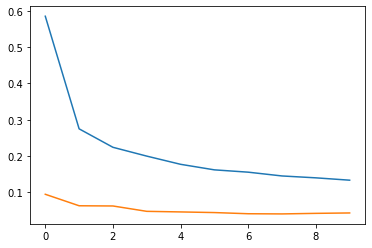

In [ ]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

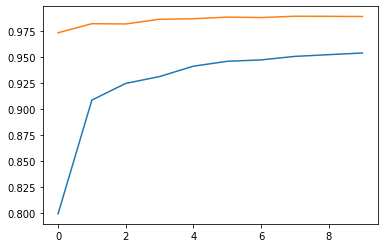

In [ ]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

In [ ]:
model.evaluate(X_test, y_test, batch_size=64)

157/157 [==============================] - 1s 5ms/step - loss: 0.0307 - accuracy: 0.9905


[0.030700553208589554, 0.9904999732971191]

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
y_true = np.argmax(y_test, axis=1)
y_true.shape

(10000,)

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [ ]:
confusion_matrix(y_true, y_pred)

array([[ 973,    1,    0,    0,    0,    1,    3,    1,    1,    0],
       [   0, 1130,    1,    3,    0,    0,    0,    0,    1,    0],
       [   0,    1, 1024,    2,    0,    0,    1,    4,    0,    0],
       [   0,    0,    0, 1005,    0,    2,    0,    2,    1,    0],
       [   0,    1,    0,    0,  970,    0,    2,    0,    1,    8],
       [   0,    0,    0,    8,    0,  880,    1,    1,    0,    2],
       [   2,    2,    0,    0,    3,    3,  946,    0,    2,    0],
       [   0,    1,    7,    1,    0,    0,    0, 1015,    1,    3],
       [   1,    0,    2,    1,    0,    0,    1,    1,  964,    4],
       [   1,    1,    0,    0,    3,    1,    0,    4,    1,  998]])

In [ ]:
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

68606236/68606236 [==============================] - 2s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
class_names = train_dataset.class_names
class_names

['cats', 'dogs']

In [ ]:
from tensorflow.data.experimental import cardinality

In [ ]:
c = cardinality(validation_dataset)

test_dataset = validation_dataset.skip(c // 5)
validation_dataset = validation_dataset.take(c // 5)

In [ ]:
from matplotlib import pyplot as plt

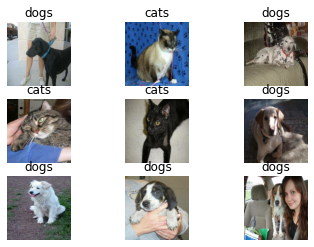

In [ ]:
for images_batch, labels_batch in train_dataset:
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')
    break

In [ ]:
from tensorflow.keras.layers import RandomRotation, RandomFlip
from tensorflow.keras.models import Sequential

In [ ]:
data_augmentation = Sequential([
    RandomRotation(factor=0.2, input_shape=INPUT_SHAPE),
    RandomFlip(mode='horizontal')
])

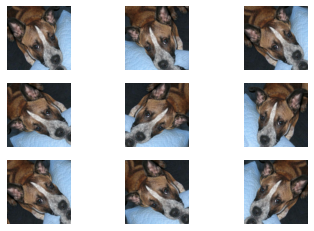

In [ ]:
for images_batch, labels_batch in train_dataset.take(1):
    first_image = images_batch[0]
    for i in range(9):
        plt.subplot(3, 3, i+1)
        transformed_image = data_augmentation(first_image, training=True)
        plt.imshow(transformed_image.numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
INPUT_SHAPE = IMG_SIZE + (3,)
base_model = MobileNetV2(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False
base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [ ]:
# model = base_model + classification_head

In [ ]:
from tensorflow.keras.applications import mobilenet_v2

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [ ]:
inputs = Input(shape=INPUT_SHAPE)
x = mobilenet_v2.preprocess_input(inputs)
x = data_augmentation(x)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(units=1)(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv_4 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_4 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0002), loss=BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 9s 91ms/step - loss: 0.7046 - accuracy: 0.5515 - val_loss: 0.4469 - val_accuracy: 0.7448
Epoch 2/10
63/63 [==============================] - 5s 75ms/step - loss: 0.4043 - accuracy: 0.7840 - val_loss: 0.2696 - val_accuracy: 0.8646
Epoch 3/10
63/63 [==============================] - 5s 73ms/step - loss: 0.3014 - accuracy: 0.8555 - val_loss: 0.2200 - val_accuracy: 0.9167
Epoch 4/10
63/63 [==============================] - 5s 73ms/step - loss: 0.2472 - accuracy: 0.8925 - val_loss: 0.1608 - val_accuracy: 0.9323
Epoch 5/10
63/63 [==============================] - 5s 73ms/step - loss: 0.2103 - accuracy: 0.9200 - val_loss: 0.1551 - val_accuracy: 0.9323
Epoch 6/10
63/63 [==============================] - 5s 72ms/step - loss: 0.2020 - accuracy: 0.9210 - val_loss: 0.1375 - val_accuracy: 0.9427
Epoch 7/10
63/63 [==============================] - 5s 75ms/step - loss: 0.1792 - accuracy: 0.9260 - val_loss: 0.1220 - val_accuracy: 0.9531
Epoch 8/10
63

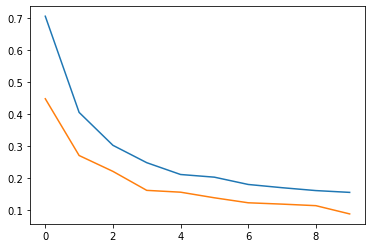

In [ ]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [ ]:
model.evaluate(test_dataset)

26/26 [==============================] - 2s 39ms/step - loss: 0.0779 - accuracy: 0.9790


[0.07789784669876099, 0.978960394859314]